In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Importing Data

The data was collected from Youtube music, Spotify and Apple Music, and other top platforms used globally



In [19]:
df = pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")

In [20]:
df.head(10)

User_ID  Age      Country Streaming Platform  Top Genre  \
0   U1000   34        Japan              Tidal     Reggae   
1   U1001   24      Germany             Deezer    Country   
2   U1002   49      Germany             Deezer        Pop   
3   U1003   55    Australia            YouTube     Reggae   
4   U1004   13      Germany       Amazon Music     Reggae   
5   U1005   25  South Korea            Spotify        EDM   
6   U1006   49    Australia              Tidal    Country   
7   U1007   32           UK       Amazon Music  Classical   
8   U1008   25      Germany              Tidal      Metal   
9   U1009   37       Brazil            Spotify     Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   
5                       536                    243         The Weeknd   
6                       547                     70      Billie Eilish   
7                        98                    448           Dua Lipa   
8                       526                     27                BTS   
9                       514                    299      Billie Eilish   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free                                Afternoon   
1           Premium                                    Night   
2           Premium                                Afternoon   
3           Premium                                  Morning   
4              Free                                    Night   
5           Premium                                Afternoon   
6              Free                                    Night   
7           Premium                                Afternoon   
8           Premium                                  Morning   
9           Premium                                  Morning   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  \
0                           47.42                 16.74   
1                           12.06                 69.25   
2                           47.19                 67.38   
3                           31.27                 76.51   
4                           30.68                 43.41   
5                           70.26                 27.79   
6                           11.92                 37.75   
7                           29.48                 18.80   
8                           85.70                 42.38   
9                           53.39                 46.89   

   Longest Session Duration  
0                     59.00  
1                     18.06  
2                     72.60  
3                     71.34  
4                      6.30  
5                    107.20  
6                    114.87  
7                     19.60  
8                    107.83  
9                    105.37

In [21]:
print("Dataset Shape:", df.shape)


Dataset Shape: (5000, 13)


In [22]:
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekl

In [23]:
print("\nDescriptive Statistics:")
df.describe()



Descriptive Statistics:


Age  Minutes Streamed Per Day  Number of Songs Liked  \
count  5000.000000               5000.000000             5000.00000   
mean     36.664000                309.237200              253.51720   
std      13.763844                172.029822              146.36928   
min      13.000000                 10.000000                1.00000   
25%      25.000000                161.000000              126.00000   
50%      37.000000                316.000000              254.00000   
75%      49.000000                457.250000              382.00000   
max      60.000000                600.000000              500.00000   

       Discover Weekly Engagement (%)  Repeat Song Rate (%)  \
count                     5000.000000           5000.000000   
mean                        50.296464             42.391060   
std                         23.171936             21.444121   
min                         10.020000              5.000000   
25%                         30.147500             24.195000   
50%                         50.420000             41.960000   
75%                         70.337500             60.740000   
max                         89.990000             79.990000   

       Longest Session Duration  
count               5000.000000  
mean                  63.426310  
std                   35.307105  
min                    2.000000  
25%                   33.136250  
50%                   64.400000  
75%                   93.800000  
max                  126.000000

# Data Pre-processing and PCA

In [27]:
column_mapping = {
    'User_ID':'User_ID',
    'age':'Age',
    'Country': 'Country',
    'Streaming Platform': 'Streaming_Platform',
    'Top Genre': 'Top_Genre',
    'Minutes Streamed Per Day': 'Minutes_Streamed_Per_Day',
    'Number of Songs Liked': 'Number_of_Songs_Liked',
    'Most Played Artist': 'Most_Played_Artist',
    'Subscription Type': 'Subscription_Type',
    'Listening Time (Morning/Afternoon/Night)': 'Listening_Time',
    'Discover Weekly Engagement (%)': 'Discover_Weekly_Engagement',
    'Repeat Song Rate (%)	': 'Repeat_Song_Rate',
    "Age_Group": "Age_Group",
    "Streaming_Segment": "Streaming_Segment",
    "Cluster":"Cluster",
    "Longest Session Duration" : "Longest_Session_Duration"
}

In [28]:
df = df.rename(columns=column_mapping)
df.head()


User_ID  Age    Country Streaming_Platform Top_Genre  \
0   U1000   34      Japan              Tidal    Reggae   
1   U1001   24    Germany             Deezer   Country   
2   U1002   49    Germany             Deezer       Pop   
3   U1003   55  Australia            YouTube    Reggae   
4   U1004   13    Germany       Amazon Music    Reggae   

   Minutes_Streamed_Per_Day  Number_of_Songs_Liked Most_Played_Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   

  Subscription_Type Listening_Time  Discover_Weekly_Engagement  \
0              Free      Afternoon                       47.42   
1           Premium          Night                       12.06   
2           Premium      Afternoon                       47.19   
3           Premium        Morning                       31.27   
4              Free          Night                       30.68   

   Repeat Song Rate (%)  Longest_Session_Duration  
0                 16.74                     59.00  
1                 69.25                     18.06  
2                 67.38                     72.60  
3                 76.51                     71.34  
4                 43.41                      6.30

In [29]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


User_ID                       0
Age                           0
Country                       0
Streaming_Platform            0
Top_Genre                     0
Minutes_Streamed_Per_Day      0
Number_of_Songs_Liked         0
Most_Played_Artist            0
Subscription_Type             0
Listening_Time                0
Discover_Weekly_Engagement    0
Repeat Song Rate (%)          0
Longest_Session_Duration      0
dtype: int64

since there are no missing values we can move ahead with this datasets and since we need all the attributes we need not to do a Principal component analysis.


# Exploratory Data Analysis


In [30]:
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

In [31]:
def save_plot(filename):
    plt.show()
    plt.tight_layout()
    plt.savefig(f"{filename}.png", dpi=300)
    plt.close()

## Univariate Analysis


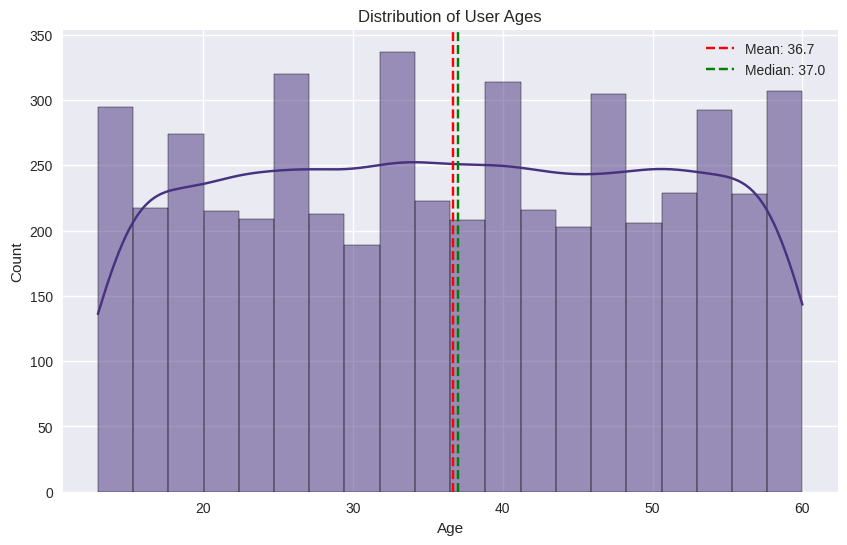

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
plt.legend()
plt.show()
save_plot('age_distribution')

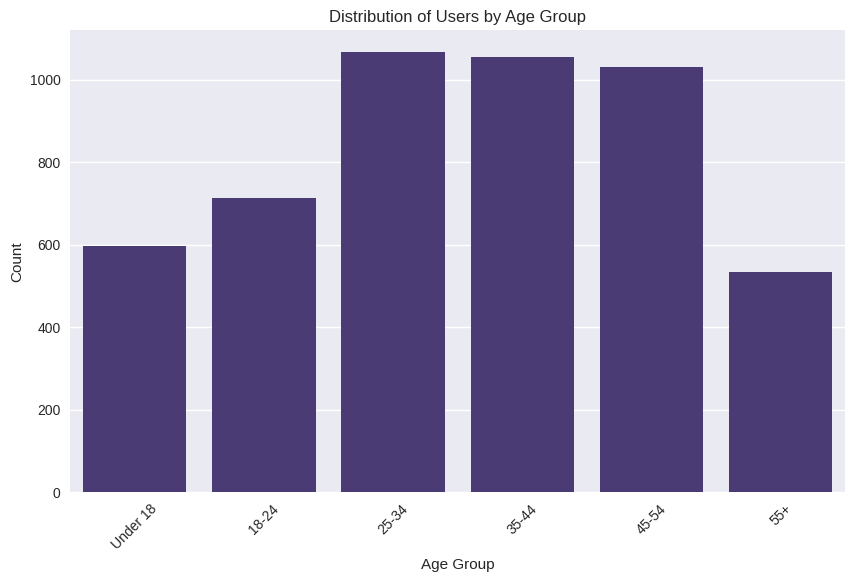

In [33]:
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
age_counts = df['Age_Group'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Distribution of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
save_plot('age_groups')

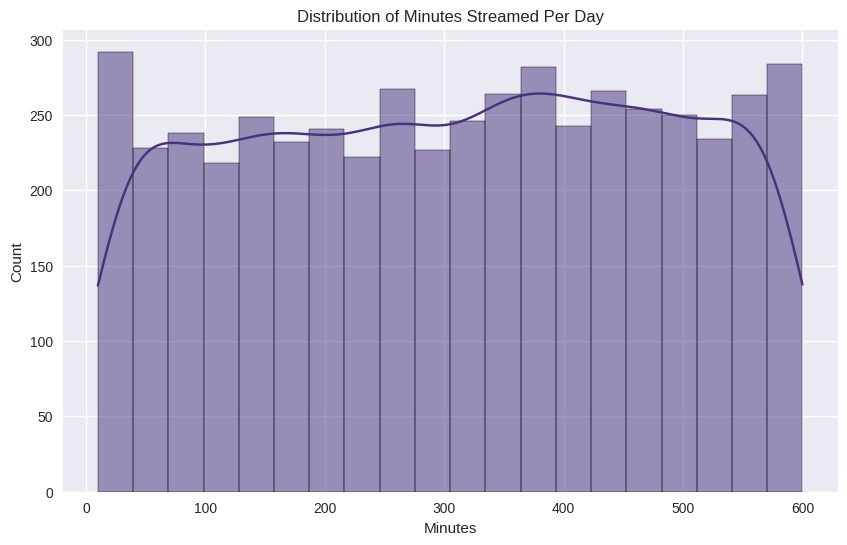

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Minutes_Streamed_Per_Day'], kde=True, bins=20)
plt.title('Distribution of Minutes Streamed Per Day')
plt.xlabel('Minutes')
plt.ylabel('Count')
save_plot('minutes_streamed_distribution')

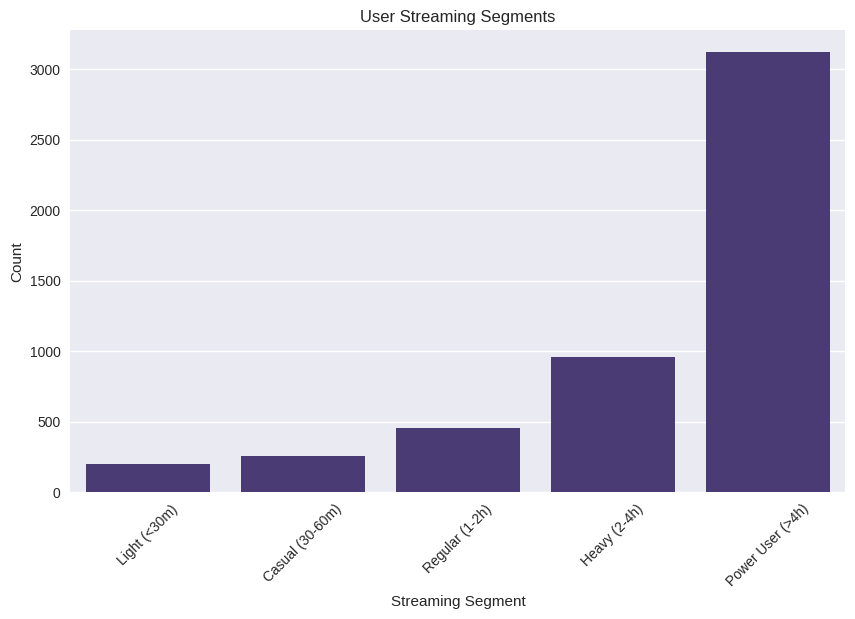

In [35]:
streaming_bins = [0, 30, 60, 120, 240, 10000]
streaming_labels = ['Light (<30m)', 'Casual (30-60m)', 'Regular (1-2h)', 'Heavy (2-4h)', 'Power User (>4h)']
df['Streaming_Segment'] = pd.cut(df['Minutes_Streamed_Per_Day'], bins=streaming_bins, labels=streaming_labels)

plt.figure(figsize=(10, 6))
streaming_counts = df['Streaming_Segment'].value_counts().sort_index()
sns.barplot(x=streaming_counts.index, y=streaming_counts.values)
plt.title('User Streaming Segments')
plt.xlabel('Streaming Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
save_plot('streaming_segments')

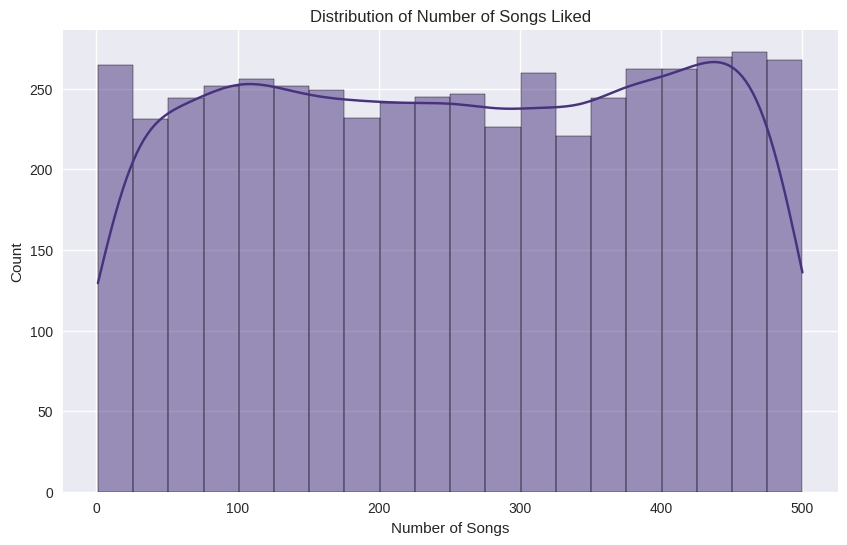

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Songs_Liked'], kde=True, bins=20)
plt.title('Distribution of Number of Songs Liked')
plt.xlabel('Number of Songs')
plt.ylabel('Count')
save_plot('songs_liked_distribution')

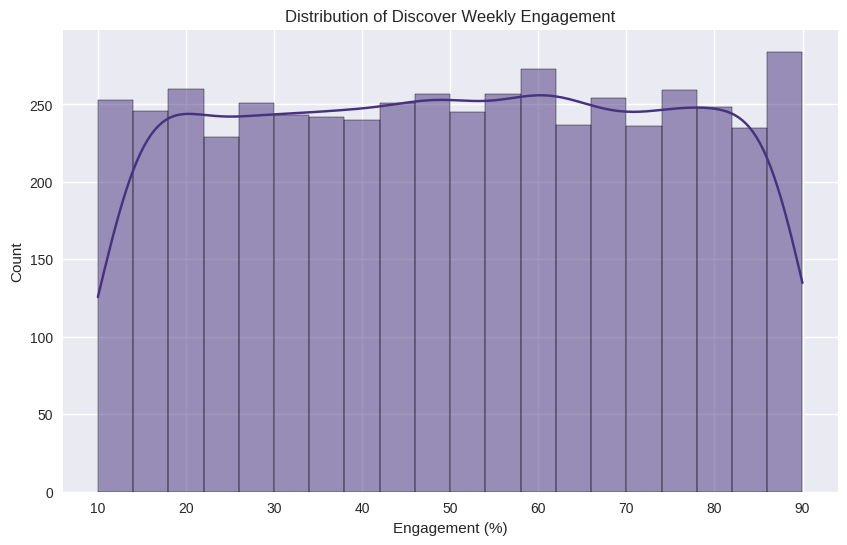

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discover_Weekly_Engagement'], kde=True, bins=20)
plt.title('Distribution of Discover Weekly Engagement')
plt.xlabel('Engagement (%)')
plt.ylabel('Count')
save_plot('discover_weekly_distribution')


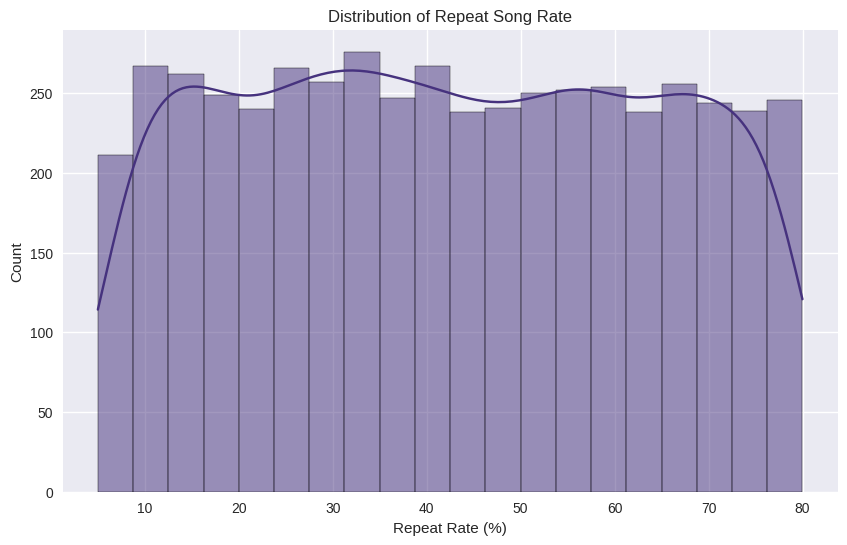

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Repeat Song Rate (%)'], kde=True, bins=20)
plt.title('Distribution of Repeat Song Rate')
plt.xlabel('Repeat Rate (%)')
plt.ylabel('Count')
save_plot('repeat_song_rate_distribution')

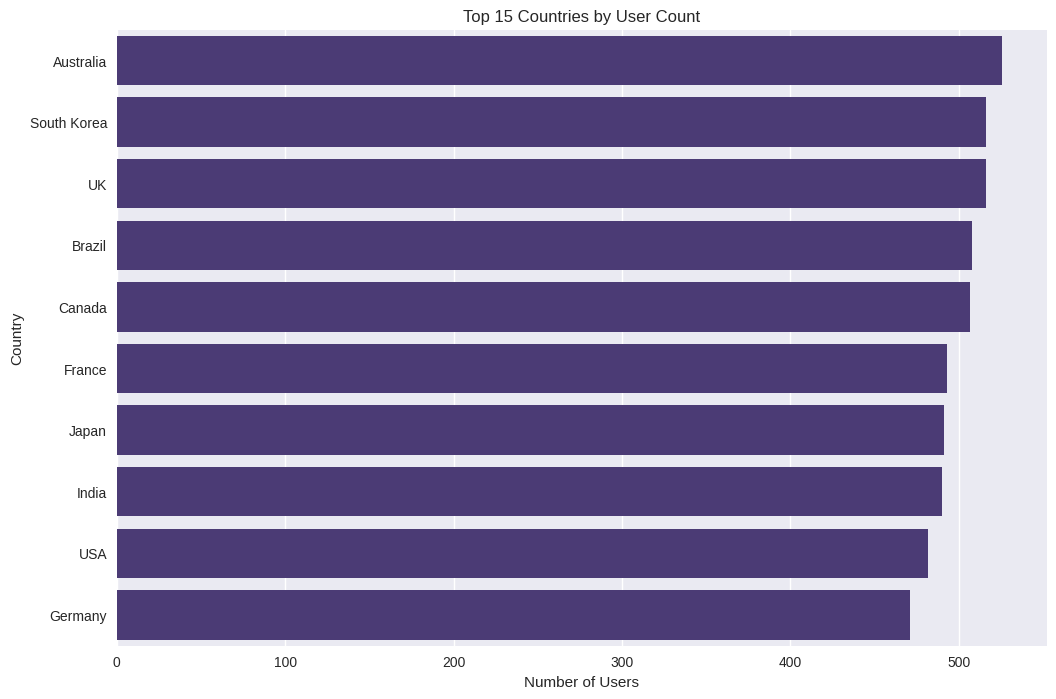

In [39]:
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts().head(15)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 15 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
save_plot('top_countries')

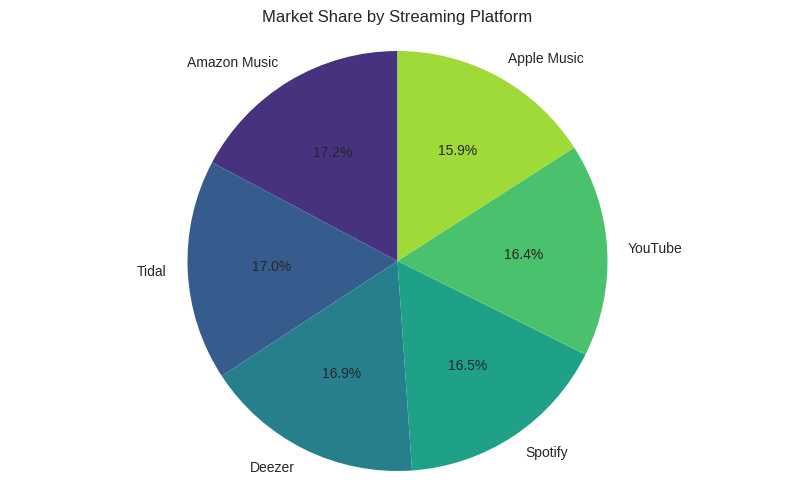

In [40]:
plt.figure(figsize=(10, 6))
platform_counts = df['Streaming_Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Market Share by Streaming Platform')
save_plot('platform_market_share')

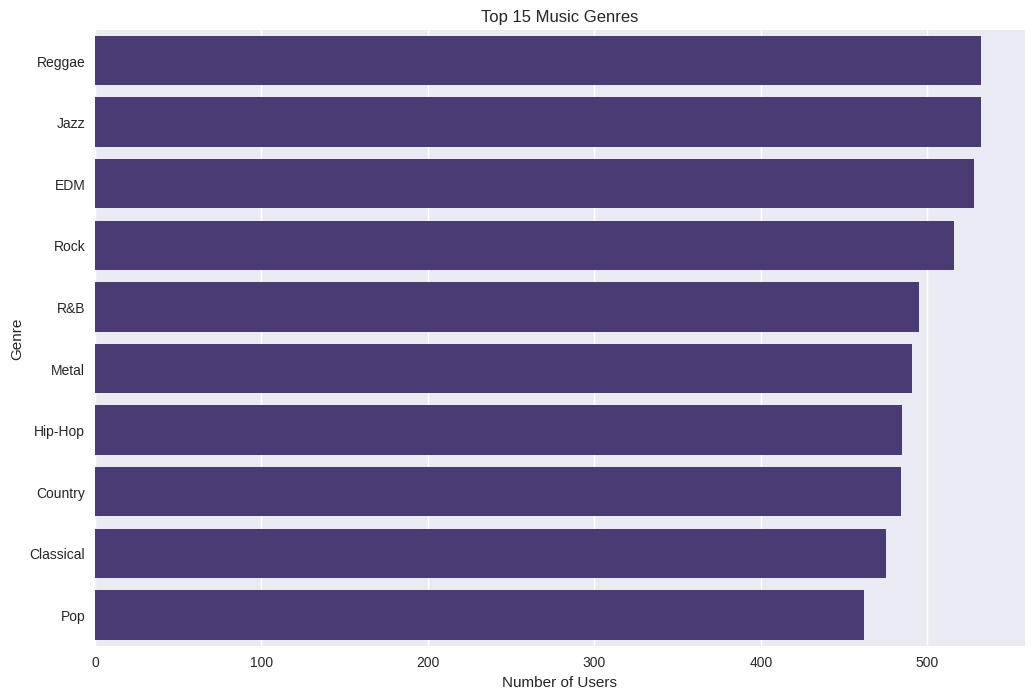

In [41]:
plt.figure(figsize=(12, 8))
genre_counts = df['Top_Genre'].value_counts().head(15)  # Top 15 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 15 Music Genres')
plt.xlabel('Number of Users')
plt.ylabel('Genre')
save_plot('top_genres')

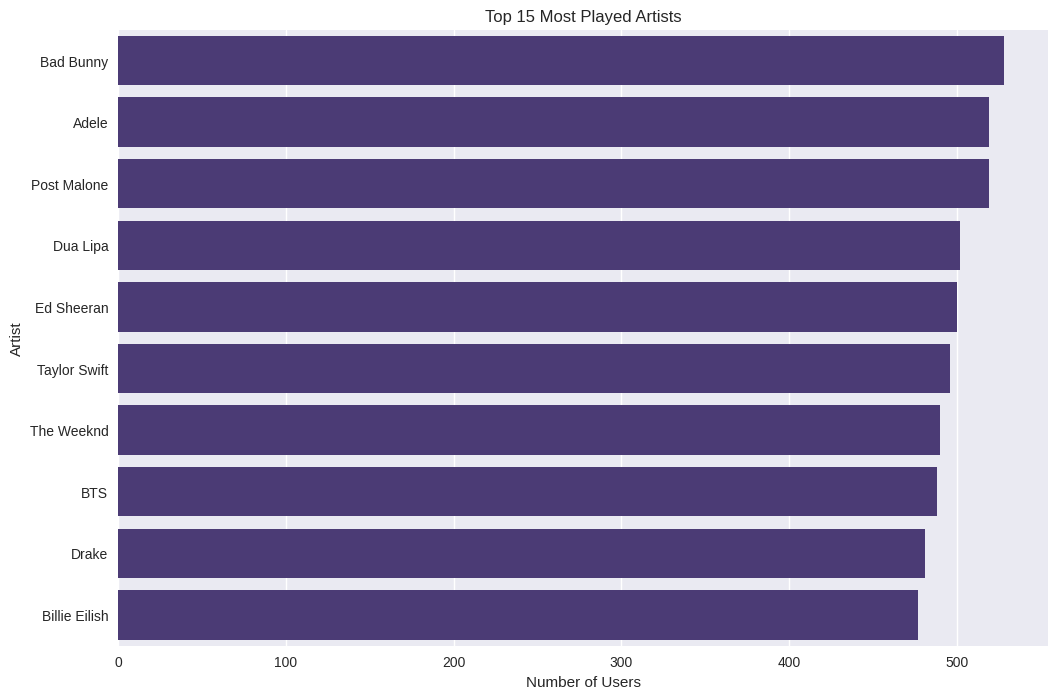

In [42]:
plt.figure(figsize=(12, 8))
artist_counts = df['Most_Played_Artist'].value_counts().head(15)
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Top 15 Most Played Artists')
plt.xlabel('Number of Users')
plt.ylabel('Artist')
save_plot('top_artists')

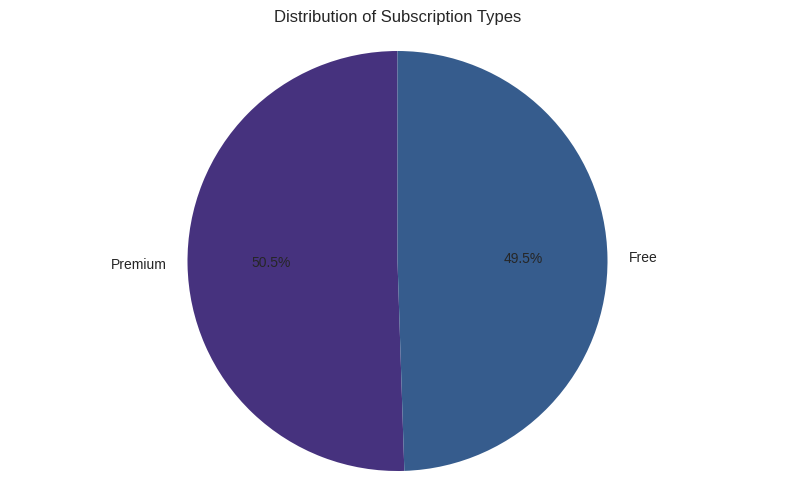

In [43]:
plt.figure(figsize=(10, 6))
subscription_counts = df['Subscription_Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Subscription Types')
save_plot('subscription_types')

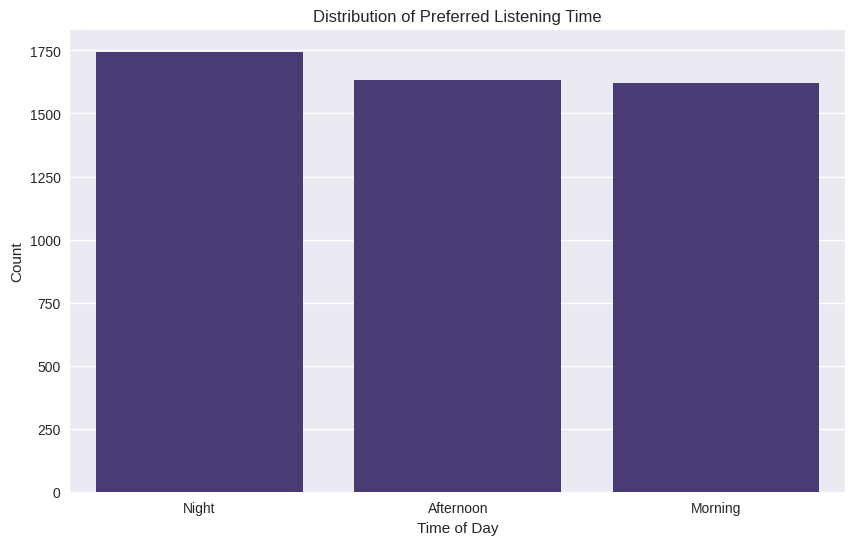

In [44]:
plt.figure(figsize=(10, 6))
listening_time_counts = df['Listening_Time'].value_counts()
sns.barplot(x=listening_time_counts.index, y=listening_time_counts.values)
plt.title('Distribution of Preferred Listening Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
save_plot('listening_time_distribution')


# BIVARIATE ANALYSIS

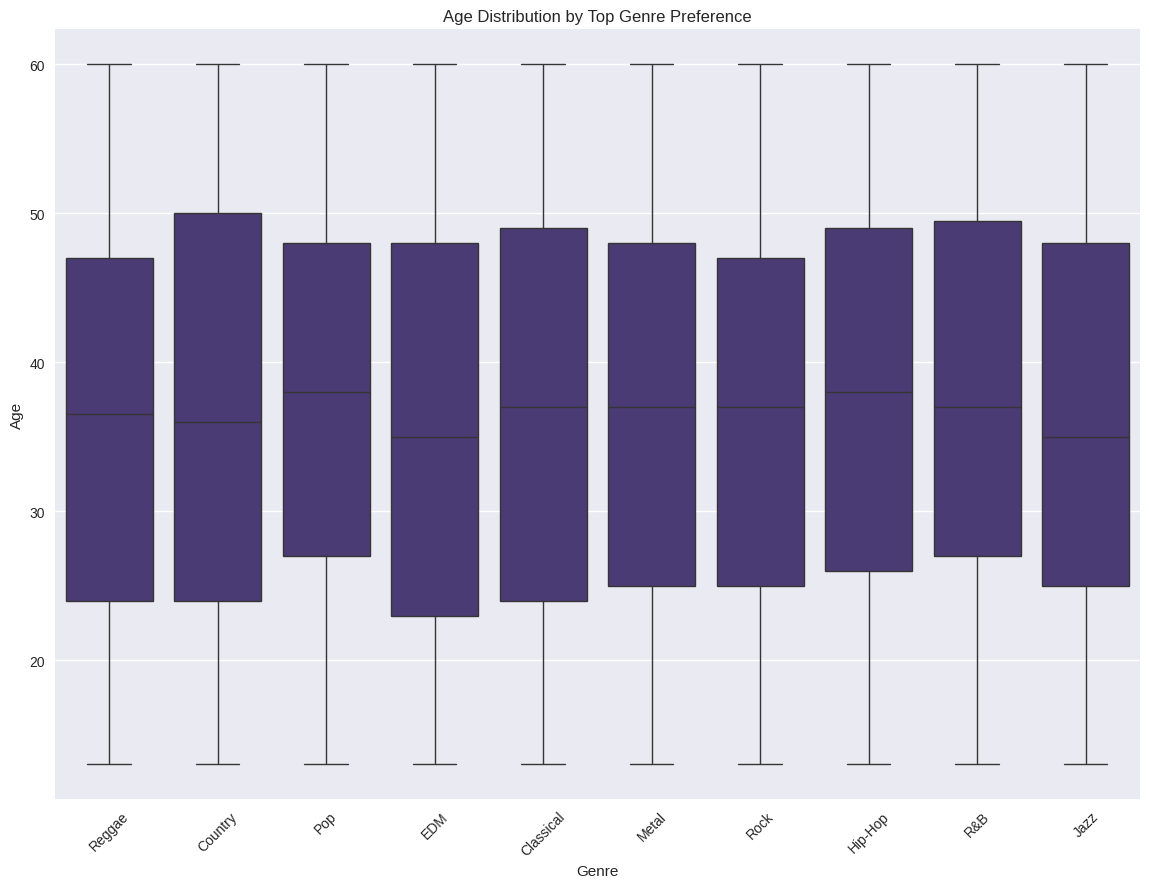

In [45]:
plt.figure(figsize=(14, 10))
top_genres = df['Top_Genre'].value_counts().head(10).index  # Top 10 genres
df_top_genres = df[df['Top_Genre'].isin(top_genres)]

sns.boxplot(x='Top_Genre', y='Age', data=df_top_genres)
plt.title('Age Distribution by Top Genre Preference')
plt.xlabel('Genre')
plt.ylabel('Age')
plt.xticks(rotation=45)
save_plot('age_by_genre')

<Figure size 1400x1000 with 0 Axes>

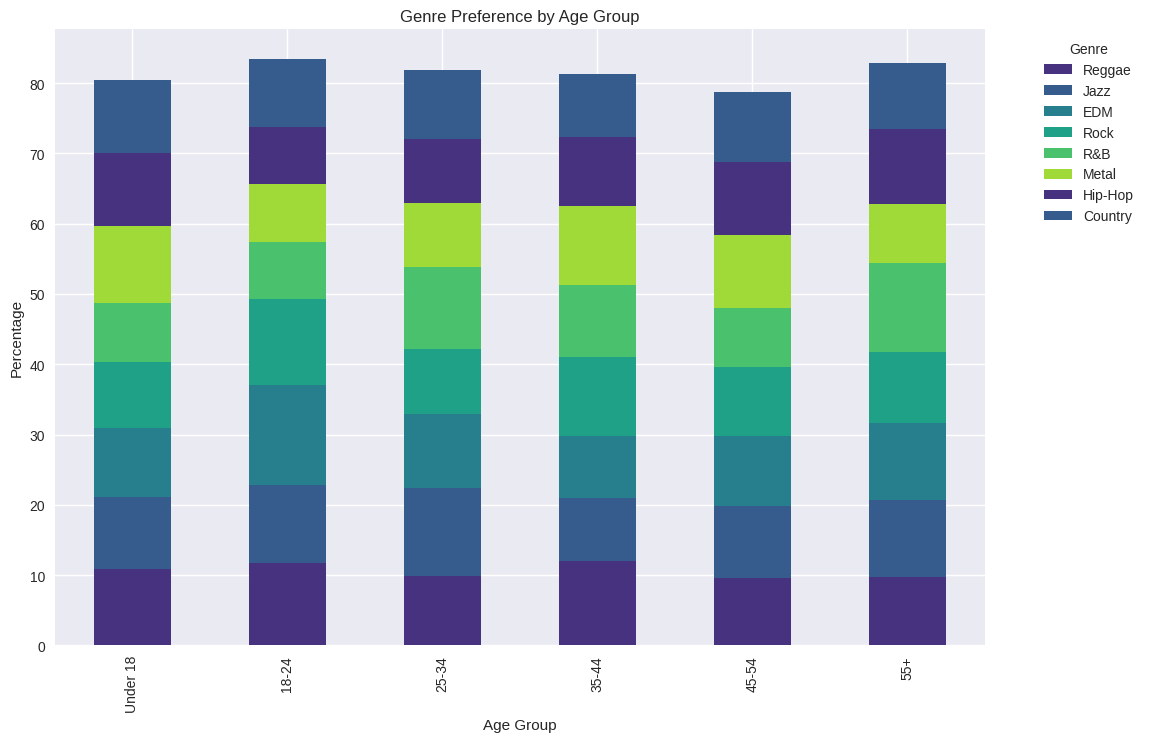

In [46]:
plt.figure(figsize=(14, 10))
genre_age_cross = pd.crosstab(df['Age_Group'], df['Top_Genre'])
genre_age_percent = genre_age_cross.div(genre_age_cross.sum(axis=1), axis=0) * 100


top_genres = df['Top_Genre'].value_counts().head(8).index
genre_age_percent = genre_age_percent[top_genres]

genre_age_percent.plot(kind='bar', stacked=True)
plt.title('Genre Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
save_plot('genre_by_age_group')

<Figure size 1400x1000 with 0 Axes>

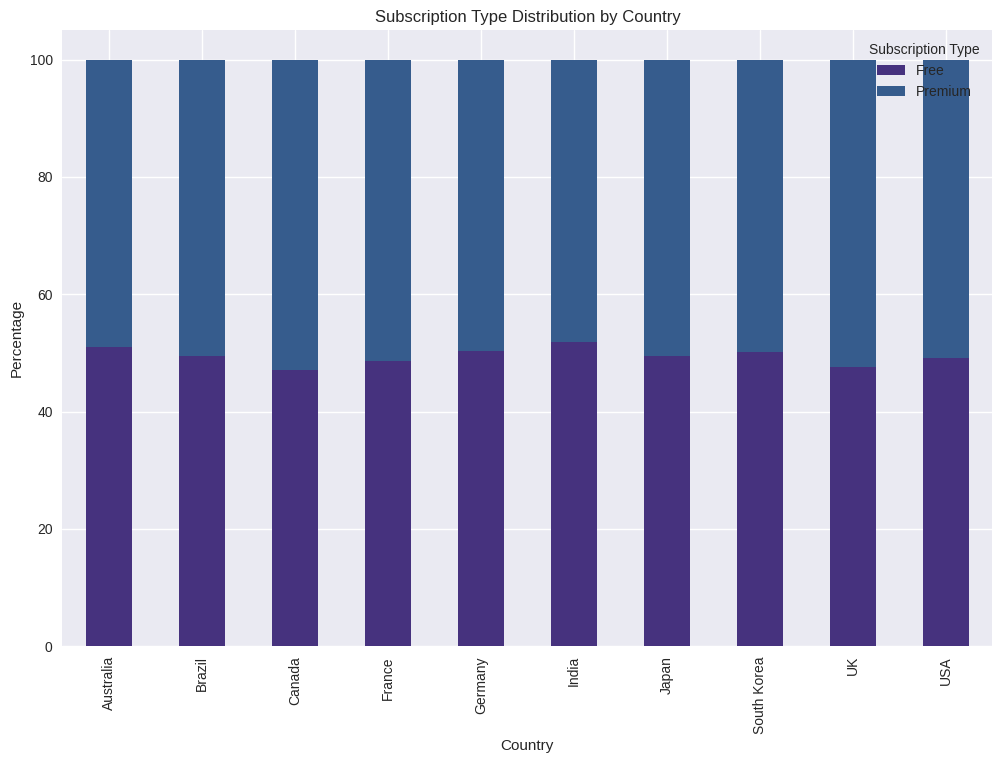

In [47]:
plt.figure(figsize=(14, 10))
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

subscription_country_cross = pd.crosstab(df_top_countries['Country'], df_top_countries['Subscription_Type'])
subscription_country_percent = subscription_country_cross.div(subscription_country_cross.sum(axis=1), axis=0) * 100
subscription_country_percent.plot(kind='bar', stacked=True)
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Subscription Type')
save_plot('subscription_by_country')

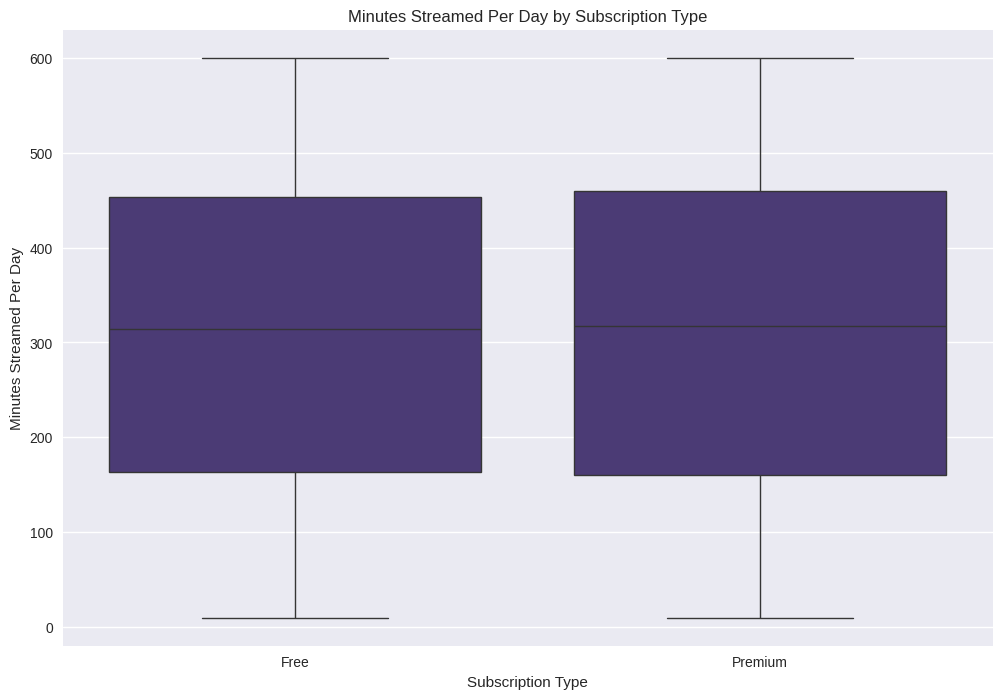

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription_Type', y='Minutes_Streamed_Per_Day', data=df)
plt.title('Minutes Streamed Per Day by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Minutes Streamed Per Day')
save_plot('minutes_by_subscription')

<Figure size 1200x800 with 0 Axes>

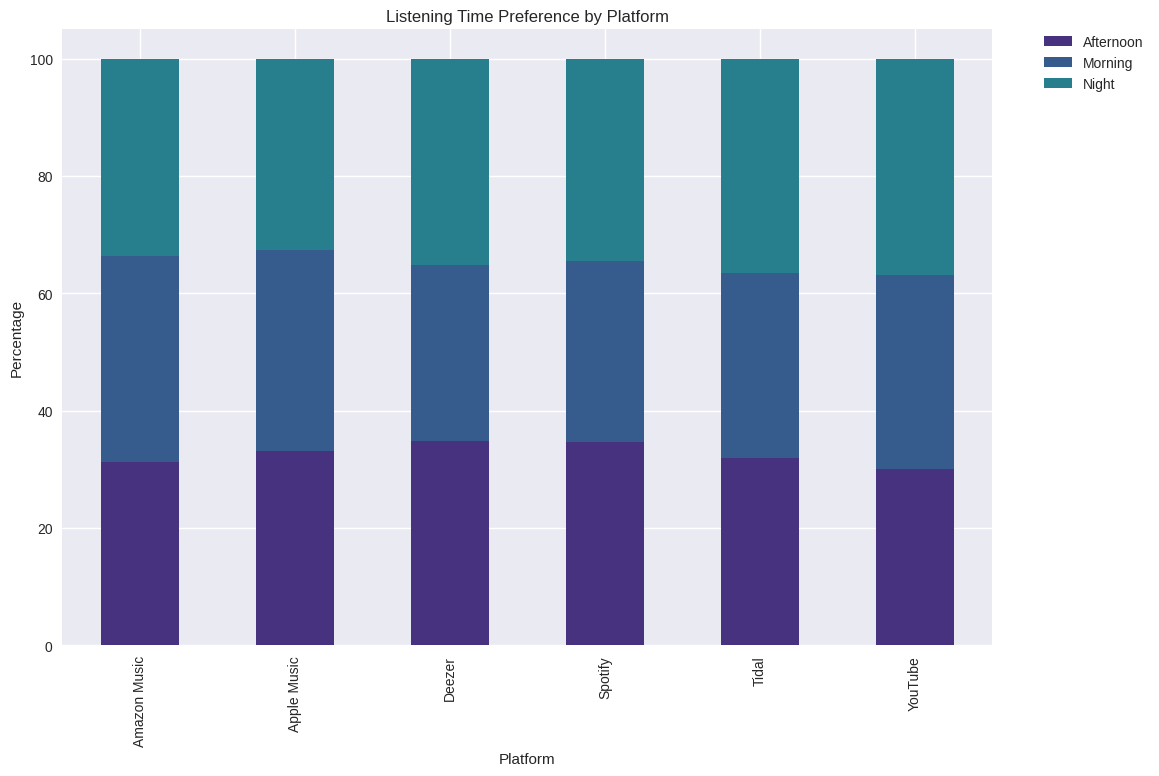

In [49]:
plt.figure(figsize=(12, 8))
platform_time_cross = pd.crosstab(df['Streaming_Platform'], df['Listening_Time'])
platform_time_percent = platform_time_cross.div(platform_time_cross.sum(axis=1), axis=0) * 100
platform_time_percent.plot(kind='bar', stacked=True)
plt.title('Listening Time Preference by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='Listening Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
save_plot('listening_time_by_platform')

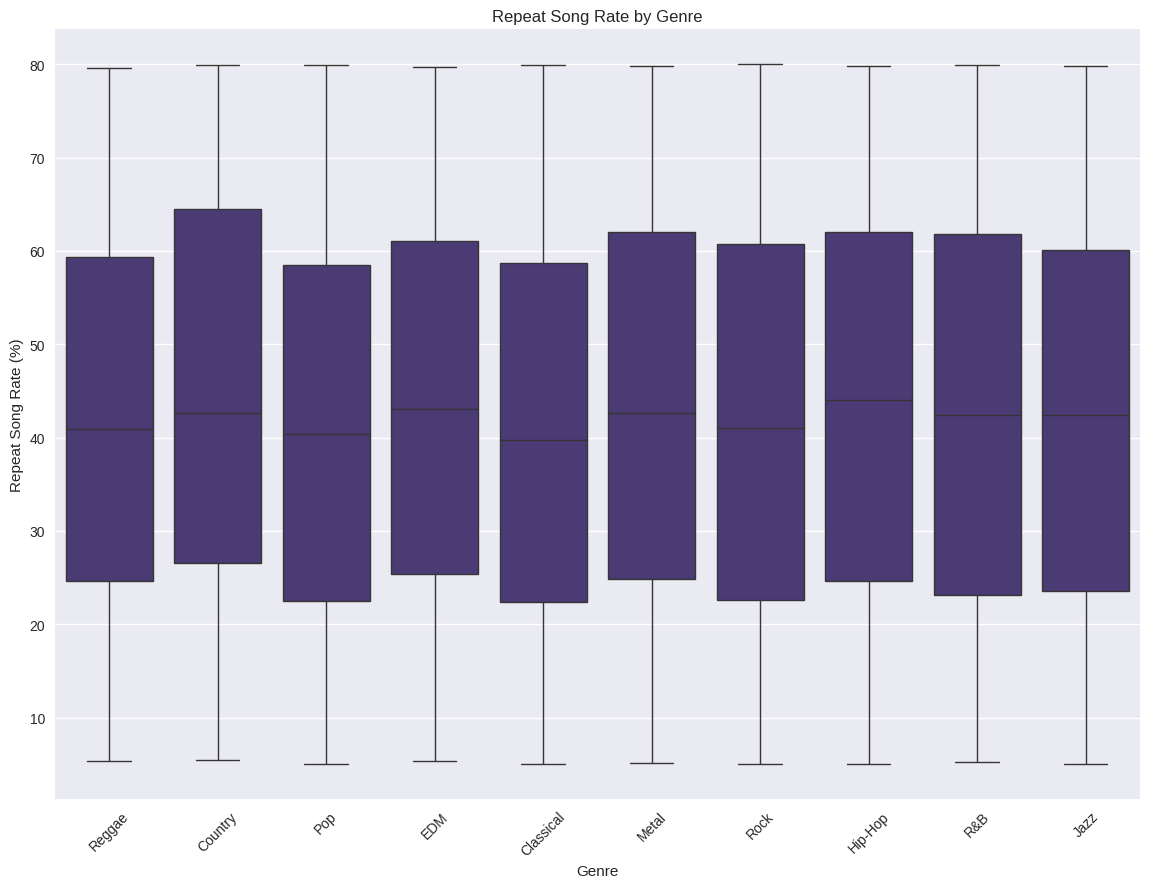

In [50]:
plt.figure(figsize=(14, 10))
top_genres = df['Top_Genre'].value_counts().head(10).index
df_top_genres = df[df['Top_Genre'].isin(top_genres)]

sns.boxplot(x='Top_Genre', y='Repeat Song Rate (%)', data=df_top_genres)
plt.title('Repeat Song Rate by Genre')
plt.xlabel('Genre')
plt.ylabel('Repeat Song Rate (%)')
plt.xticks(rotation=45)
save_plot('repeat_rate_by_genre')

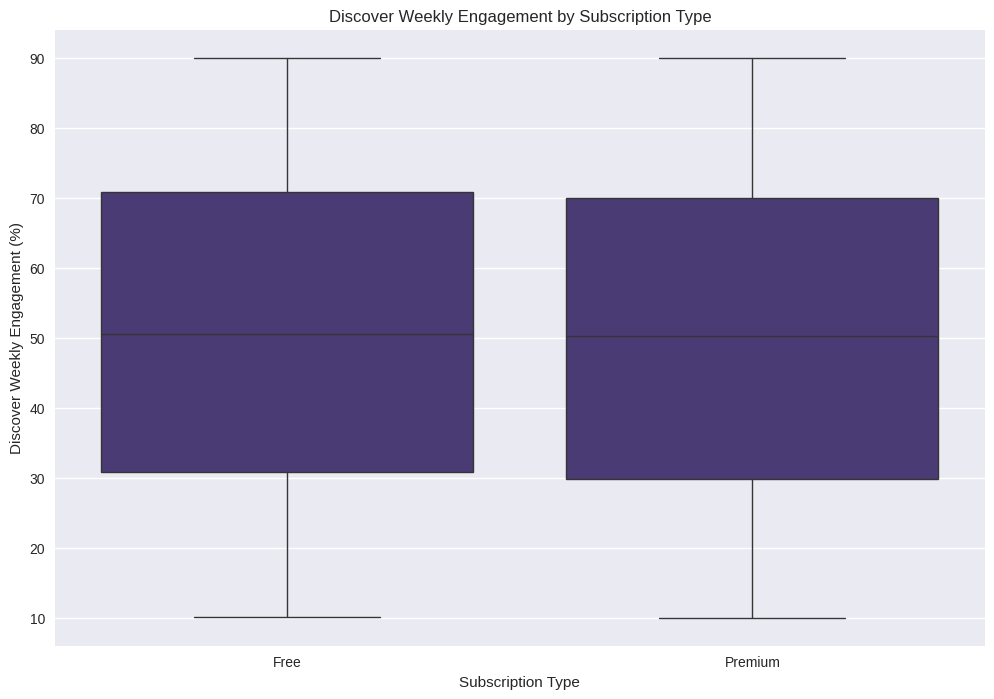

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription_Type', y='Discover_Weekly_Engagement', data=df)
plt.title('Discover Weekly Engagement by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Discover Weekly Engagement (%)')
save_plot('discovery_by_subscription')


# MULTIVARIATE ANALYSIS

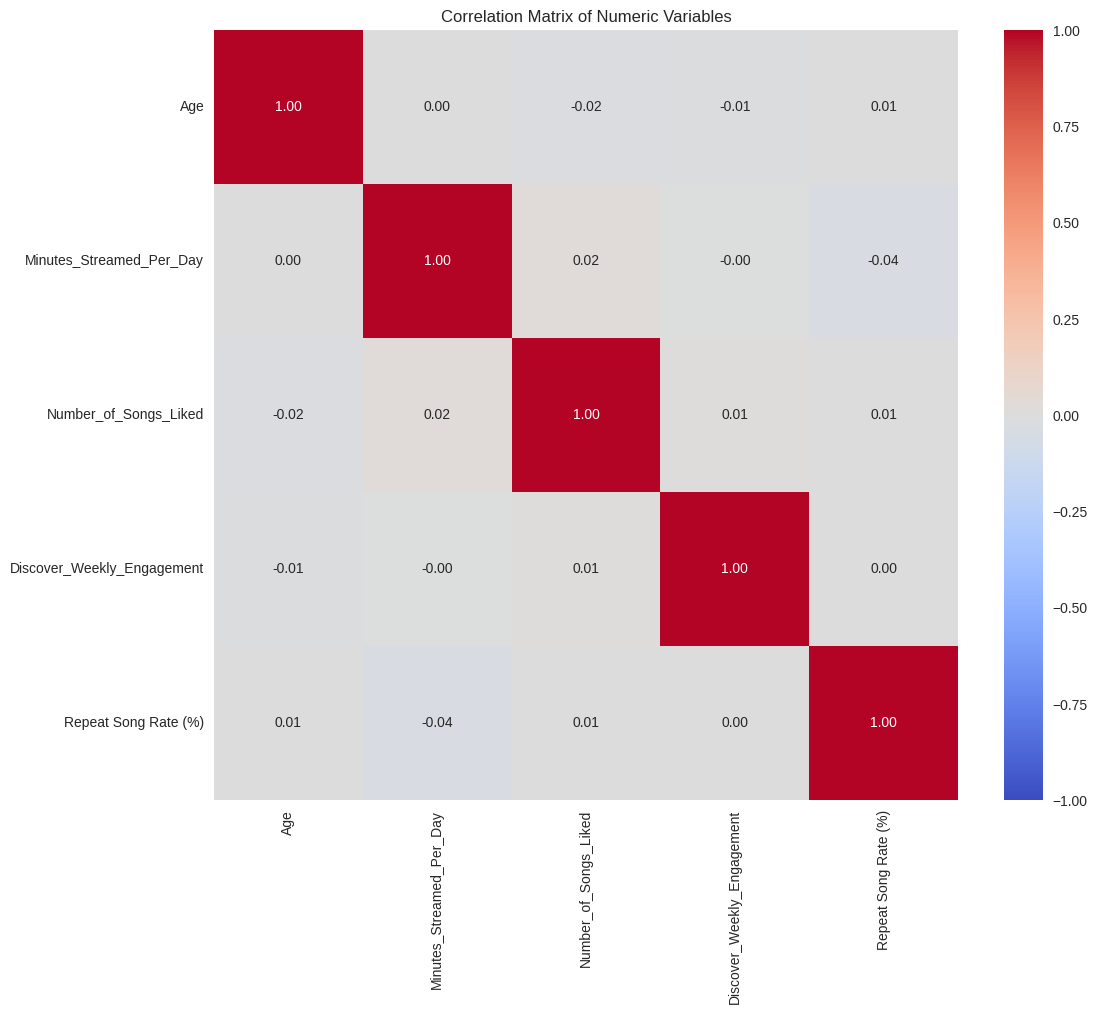

In [52]:
numeric_cols = ['Age', 'Minutes_Streamed_Per_Day', 'Number_of_Songs_Liked',
                'Discover_Weekly_Engagement', 'Repeat Song Rate (%)']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
save_plot('correlation_matrix')


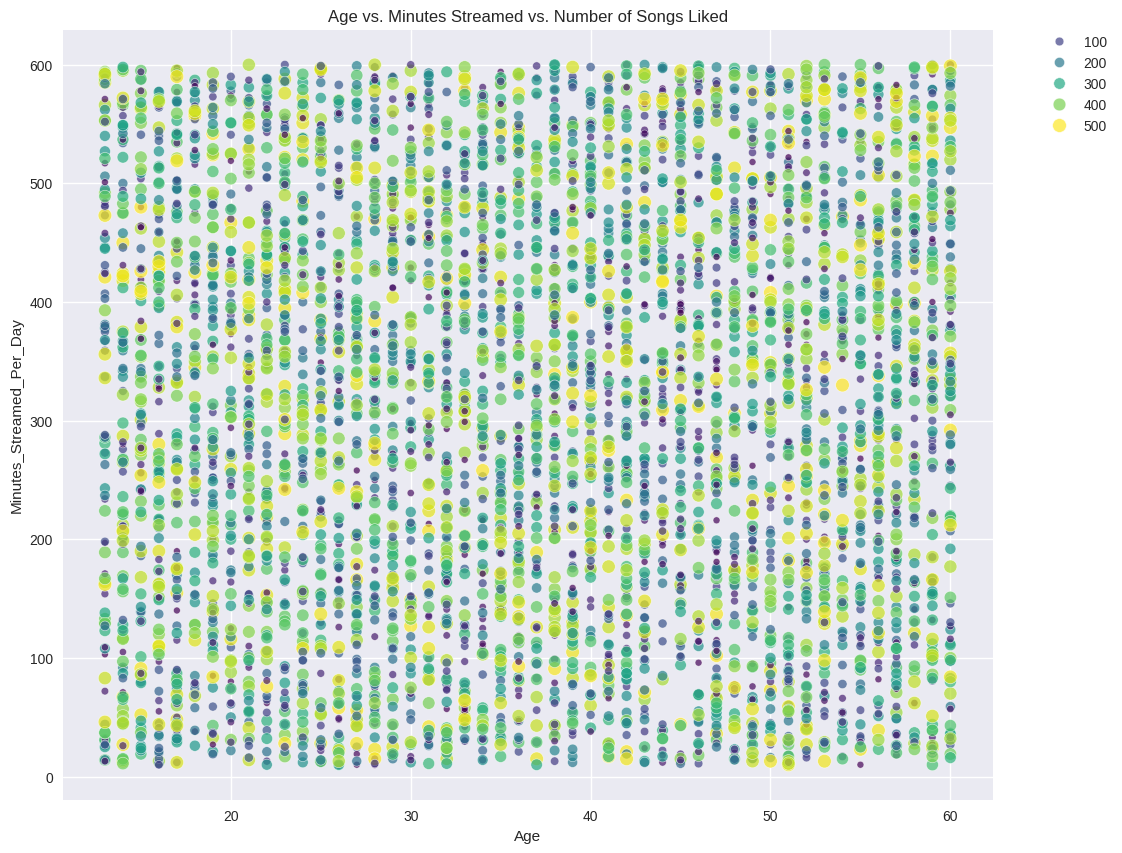

In [53]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Age', y='Minutes_Streamed_Per_Day',
                hue='Number_of_Songs_Liked', size='Number_of_Songs_Liked',
                palette='viridis', data=df, alpha=0.7)
plt.title('Age vs. Minutes Streamed vs. Number of Songs Liked')
plt.xlabel('Age')
plt.ylabel('Minutes_Streamed_Per_Day')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
save_plot('age_minutes_songs')


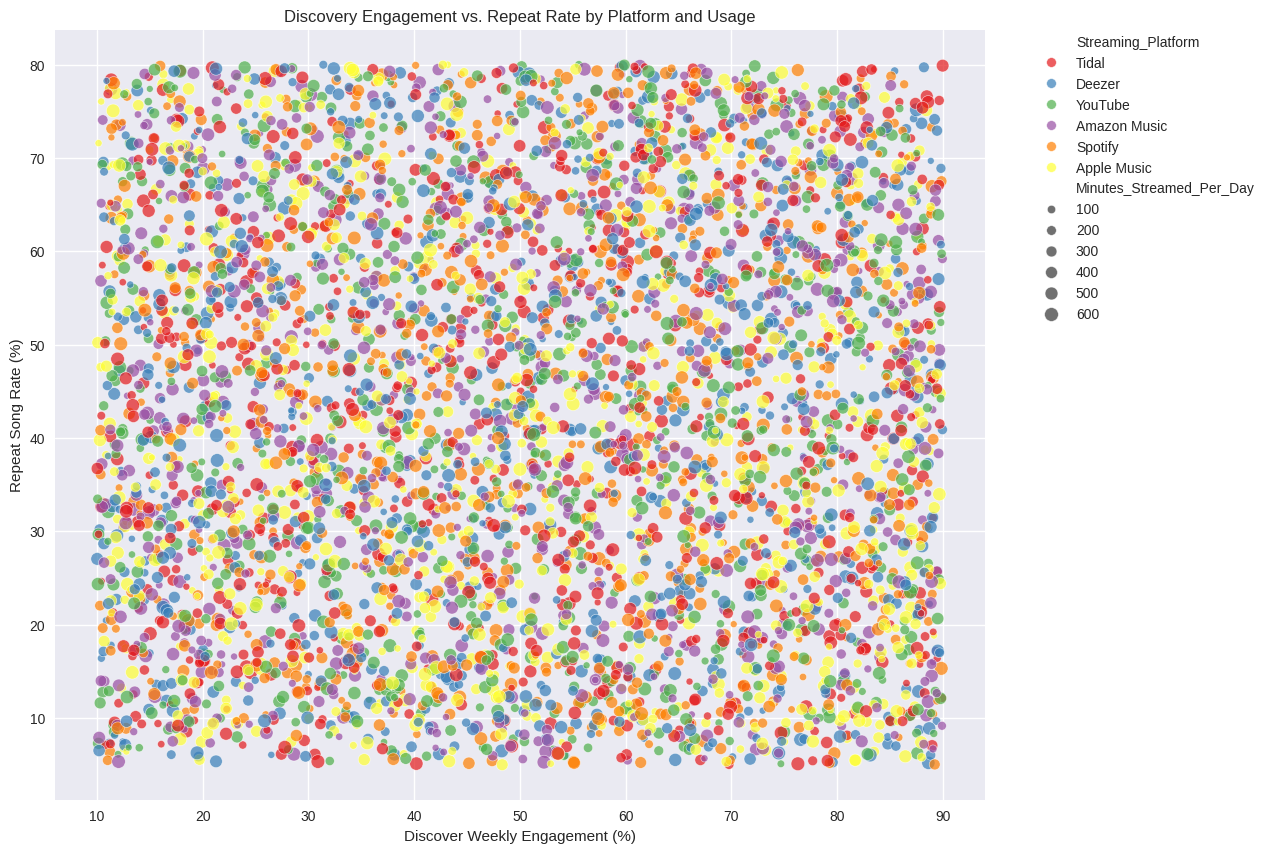

In [54]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Discover_Weekly_Engagement',
    y='Repeat Song Rate (%)',
    hue='Streaming_Platform',
    size='Minutes_Streamed_Per_Day',
    palette='Set1',
    data=df,
    alpha=0.7
)
plt.title('Discovery Engagement vs. Repeat Rate by Platform and Usage')
plt.xlabel('Discover Weekly Engagement (%)')
plt.ylabel('Repeat Song Rate (%)')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot
save_plot('discovery_repeat_platform')


# USER SEGMENTATION

In [55]:
cluster_features = ['Age', 'Minutes_Streamed_Per_Day', 'Number_of_Songs_Liked',
                    'Discover_Weekly_Engagement', 'Repeat Song Rate (%)']
X = df[cluster_features].copy()


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

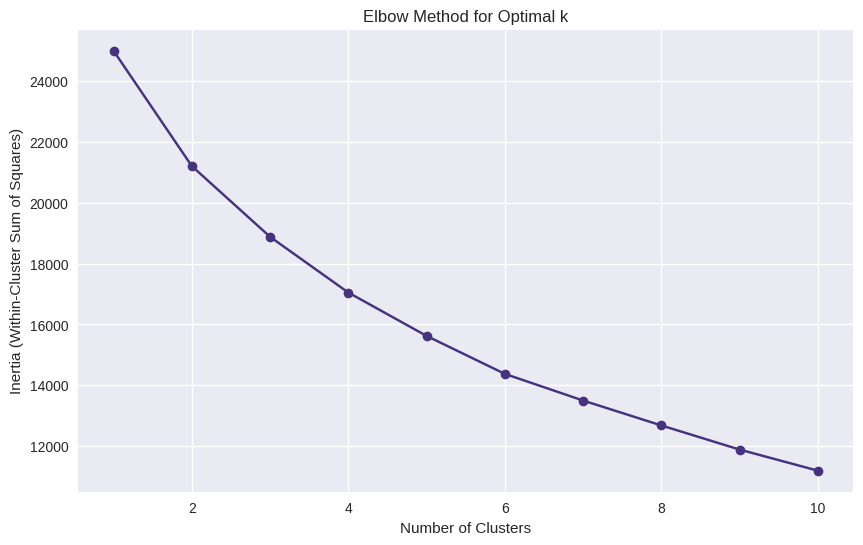

In [57]:
# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
save_plot('elbow_method')

In [58]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [59]:
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Centers:")
print(cluster_summary)



Cluster Centers:
               Age  Minutes_Streamed_Per_Day  Number_of_Songs_Liked  \
Cluster                                                               
0        35.912226                403.905956             281.416928   
1        37.449349                121.954160             232.732881   
2        36.548840                419.086081             248.771062   

         Discover_Weekly_Engagement  Repeat Song Rate (%)  
Cluster                                                    
0                         51.841009             62.128251  
1                         50.477533             42.936072  
2                         48.597137             22.584066  


In [60]:
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Centers:")
cluster_summary



Cluster Centers:


Age  Minutes_Streamed_Per_Day  Number_of_Songs_Liked  \
Cluster                                                               
0        35.912226                403.905956             281.416928   
1        37.449349                121.954160             232.732881   
2        36.548840                419.086081             248.771062   

         Discover_Weekly_Engagement  Repeat Song Rate (%)  
Cluster                                                    
0                         51.841009             62.128251  
1                         50.477533             42.936072  
2                         48.597137             22.584066

<Figure size 1400x1000 with 0 Axes>

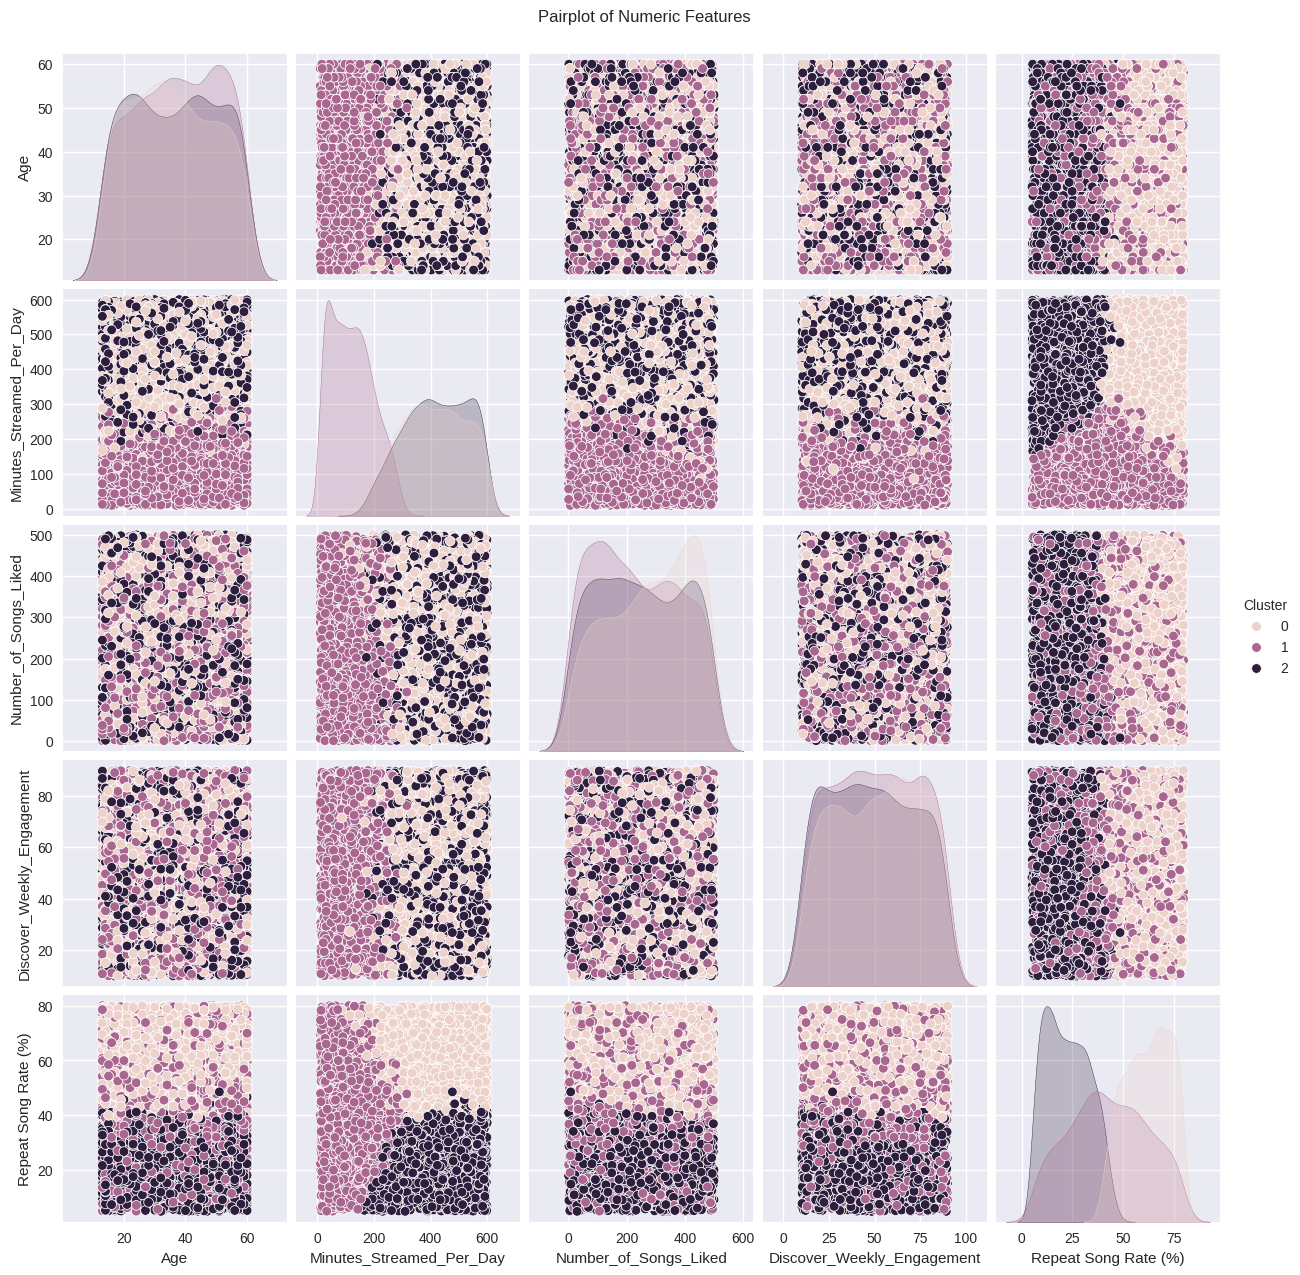

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))


numeric_cols = ['Age', 'Minutes_Streamed_Per_Day', 'Number_of_Songs_Liked',
                'Discover_Weekly_Engagement', 'Repeat Song Rate (%)']
sns.pairplot(df[numeric_cols + ['Cluster']], hue='Cluster', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()
save_plot('pairplot_numeric_features')

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

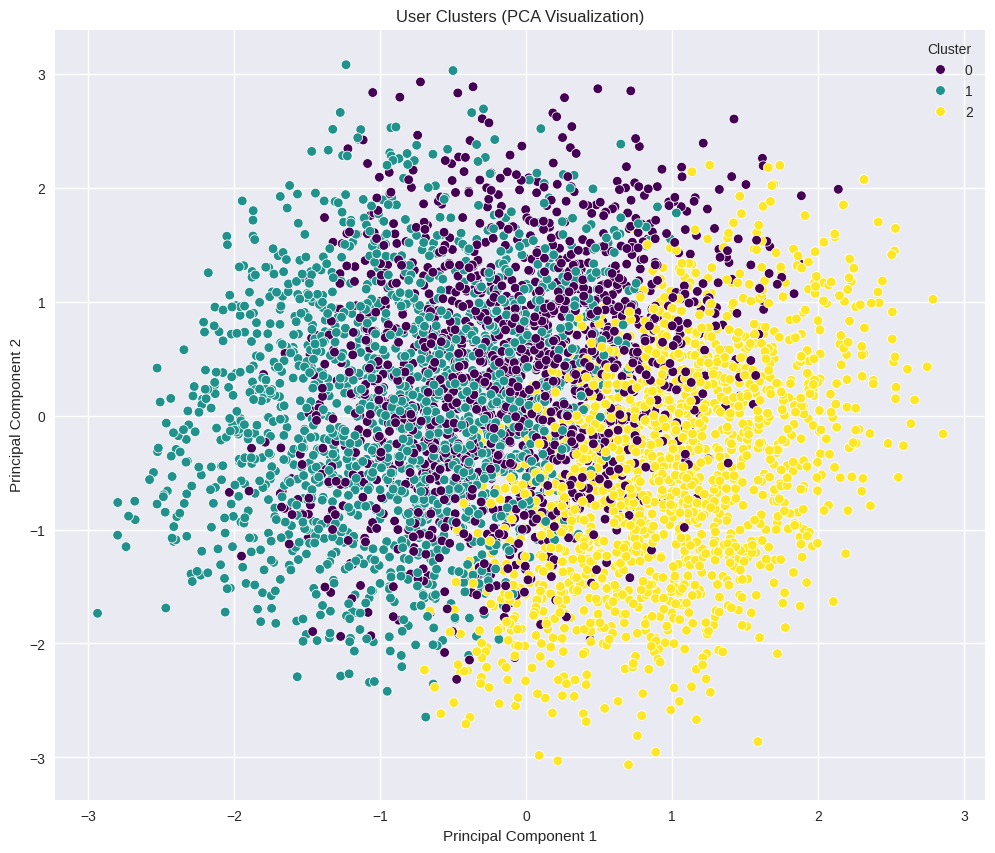

In [63]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('User Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
save_plot('user_clusters_pca')

# BUSINESS INSIGHTS ANALYSIS

In [64]:

numeric_cols = ['Age', 'Minutes_Streamed_Per_Day', 'Number_of_Songs_Liked',
                'Discover_Weekly_Engagement', 'Repeat Song Rate (%)']
streaming_corr = df[numeric_cols].corr()['Minutes_Streamed_Per_Day'].sort_values(ascending=False)

print("\nFactors correlated with streaming minutes:")
streaming_corr


Factors correlated with streaming minutes:


Minutes_Streamed_Per_Day      1.000000
Number_of_Songs_Liked         0.023487
Age                           0.004166
Discover_Weekly_Engagement   -0.004280
Repeat Song Rate (%)         -0.037508
Name: Minutes_Streamed_Per_Day, dtype: float64

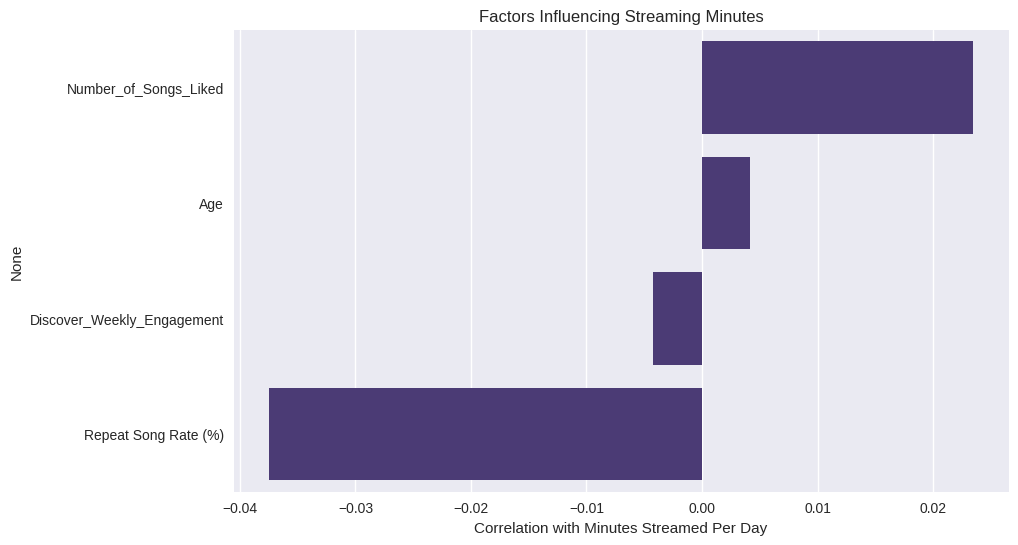

In [65]:
plt.figure(figsize=(10, 6))
streaming_corr = streaming_corr.drop('Minutes_Streamed_Per_Day')  # Drop self-correlation
sns.barplot(x=streaming_corr.values, y=streaming_corr.index)
plt.title('Factors Influencing Streaming Minutes')
plt.xlabel('Correlation with Minutes Streamed Per Day')
save_plot('streaming_minutes_factors')

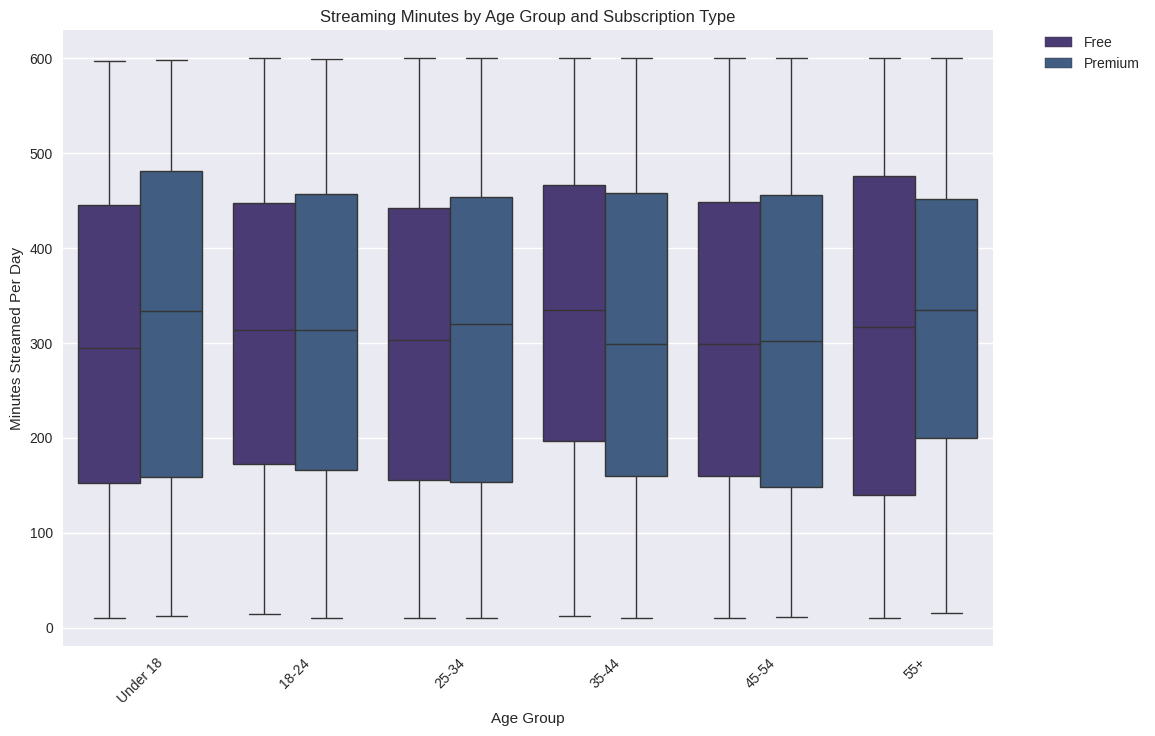

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Minutes_Streamed_Per_Day', hue='Subscription_Type', data=df)
plt.title('Streaming Minutes by Age Group and Subscription Type')
plt.xlabel('Age Group')
plt.ylabel('Minutes Streamed Per Day')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
save_plot('streaming_by_age_subscription')

<Figure size 1400x1000 with 0 Axes>

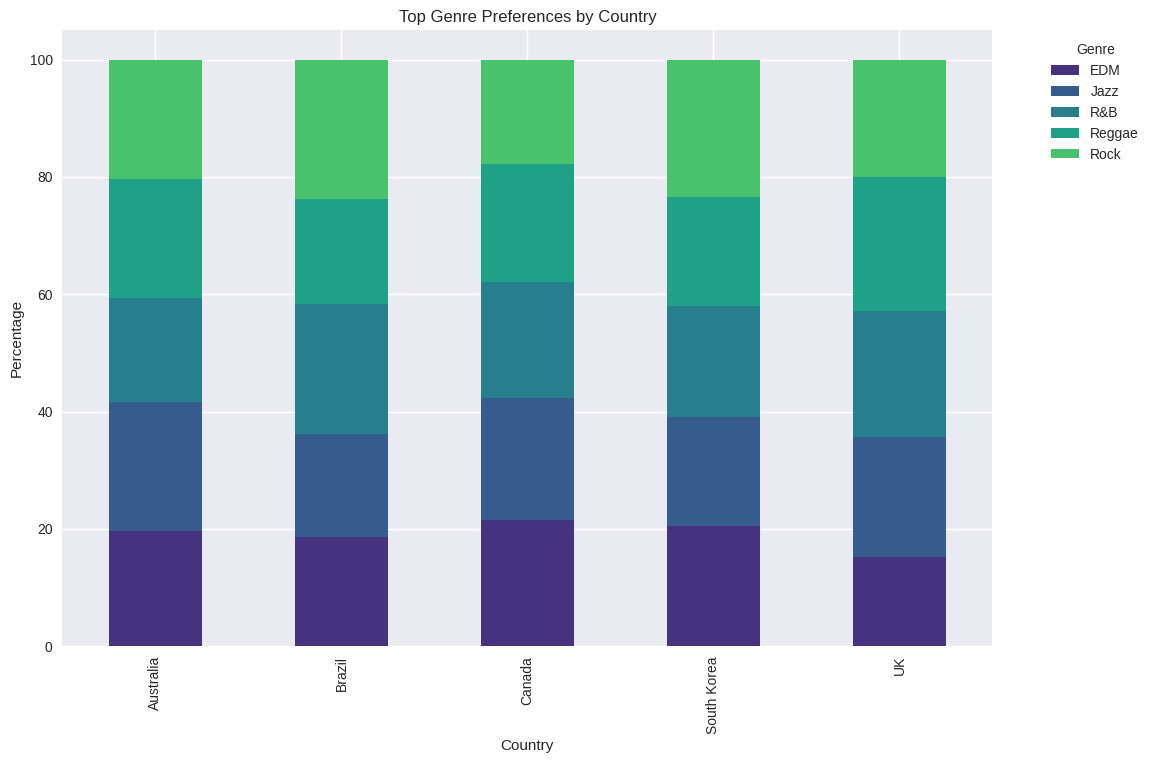

In [67]:
plt.figure(figsize=(14, 10))
top_countries = df['Country'].value_counts().head(5).index
top_genres = df['Top_Genre'].value_counts().head(5).index
df_filtered = df[df['Country'].isin(top_countries) & df['Top_Genre'].isin(top_genres)]

country_genre_cross = pd.crosstab(df_filtered['Country'], df_filtered['Top_Genre'])
country_genre_percent = country_genre_cross.div(country_genre_cross.sum(axis=1), axis=0) * 100
country_genre_percent.plot(kind='bar', stacked=True)
plt.title('Top Genre Preferences by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
save_plot('genre_preferences_country')

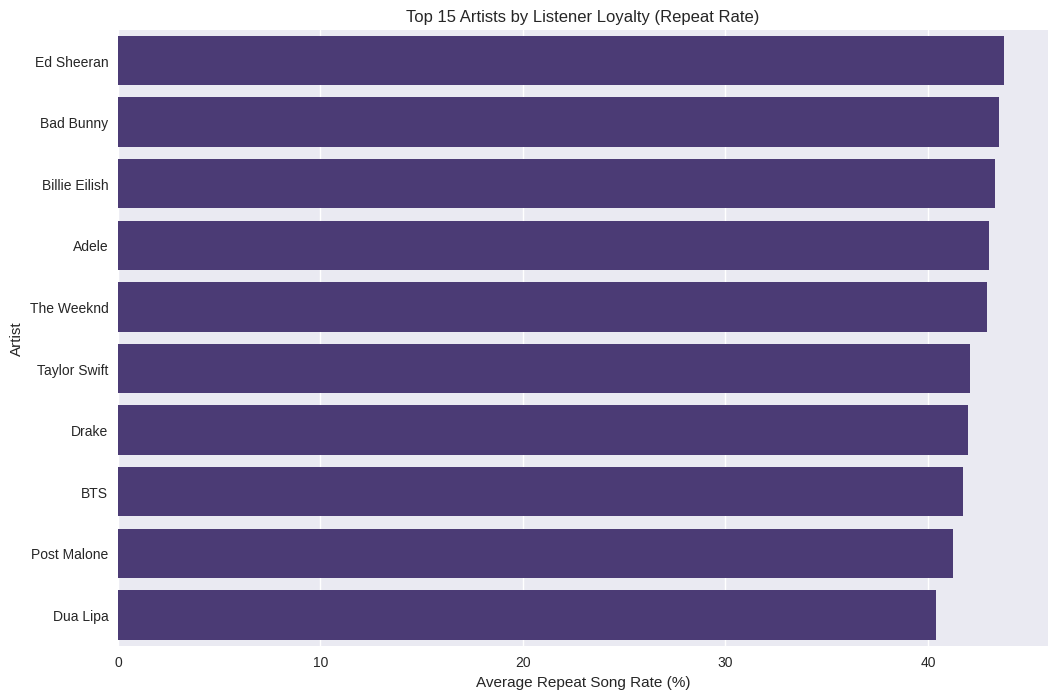

In [68]:
artist_loyalty = df.groupby('Most_Played_Artist')['Repeat Song Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=artist_loyalty.values[:15], y=artist_loyalty.index[:15])
plt.title('Top 15 Artists by Listener Loyalty (Repeat Rate)')
plt.xlabel('Average Repeat Song Rate (%)')
plt.ylabel('Artist')
save_plot('artist_loyalty')

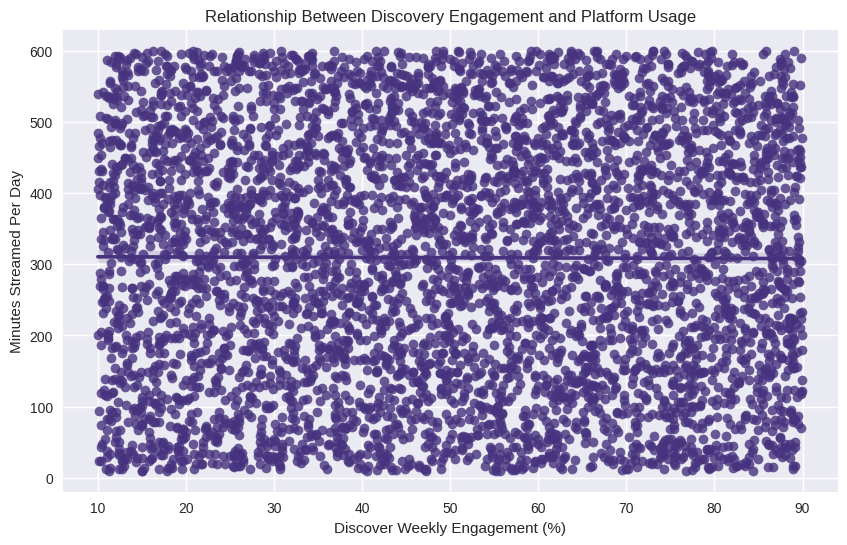

In [69]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Discover_Weekly_Engagement', y='Minutes_Streamed_Per_Day', data=df)
plt.title('Relationship Between Discovery Engagement and Platform Usage')
plt.xlabel('Discover Weekly Engagement (%)')
plt.ylabel('Minutes Streamed Per Day')
save_plot('discovery_usage_relationship')

In [70]:
df.to_csv('processed_music_streaming_data.csv', index=False)

print("\nEDA complete! All plots have been saved to the 'plots' directory.")


EDA complete! All plots have been saved to the 'plots' directory.


In [71]:

from sklearn.decomposition import PCA


features = ['Age', 'Country', 'Streaming_Platform', 'Top_Genre', 'Minutes_Streamed_Per_Day',
            'Number_of_Songs_Liked', 'Most_Played_Artist', 'Subscription_Type',
            'Listening_Time', 'Discover_Weekly_Engagement', 'Repeat Song Rate (%)']
X = df[features]
y = df['Streaming_Segment']


categorical_cols = ['Country', 'Streaming_Platform', 'Top_Genre', 'Most_Played_Artist',
                   'Subscription_Type', 'Listening_Time']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)




pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.964
                  precision    recall  f1-score   support

 Casual (30-60m)       0.71      0.70      0.70        53
    Heavy (2-4h)       0.98      1.00      0.99       190
    Light (<30m)       0.95      0.65      0.77        54
Power User (>4h)       1.00      1.00      1.00       630
  Regular (1-2h)       0.82      0.99      0.89        73

        accuracy                           0.96      1000
       macro avg       0.89      0.87      0.87      1000
    weighted avg       0.97      0.96      0.96      1000



In [72]:

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_pipeline.fit(X_train, y_train)
gb_y_pred = gb_pipeline.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Accuracy: 1.0
                  precision    recall  f1-score   support

 Casual (30-60m)       1.00      1.00      1.00        53
    Heavy (2-4h)       1.00      1.00      1.00       190
    Light (<30m)       1.00      1.00      1.00        54
Power User (>4h)       1.00      1.00      1.00       630
  Regular (1-2h)       1.00      1.00      1.00        73

        accuracy                           1.00      1000
       macro avg       1.00      1.00      1.00      1000
    weighted avg       1.00      1.00      1.00      1000



In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
df['time_of_day_encoded'] = label_encoder.fit_transform(df['Listening_Time'])

X = df[['Longest_Session_Duration', 'Minutes_Streamed_Per_Day', 'Subscription_Type', 'Age']]  # Features
y = df['time_of_day_encoded']  # Target (encoded Time of Day)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('subscription', OneHotEncoder(), ['Subscription_Type'])  # OneHotEncode the 'Subscription Type' column
    ],
    remainder='passthrough'  # Keep the other features as they are
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Random Forest Classifier Accuracy: 0.6410
              precision    recall  f1-score   support

   Afternoon       0.66      0.66      0.66       335
     Morning       0.58      0.60      0.59       331
       Night       0.69      0.66      0.67       334

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000



In [80]:
import joblib

joblib.dump(pipeline, 'random_forest_model.pkl')
print("Model saved successfully as 'random_forest_pipeline.pkl'")


Model saved successfully as 'random_forest_pipeline.pkl'
